In [334]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
data = pd.read_csv("tsp.csv", index_col=0)
data.x = data.x.astype(int)
data.y = data.y.astype(int)

In [335]:
def dist(d):

    #return d.diff().fillna(0).abs().sum().sum()
    return sum(np.abs(np.diff(d.x)) + np.abs(np.diff(d.y)))
    
    #repeated = pd.DataFrame(np.repeat(d.x,2))
    #repeated["y"] = np.repeat(d.y,2).shift(1).fillna(0).astype("int")
    return np.linalg.norm(d.iloc[1:] - d.iloc[1:].shift(-1).fillna(0), ord=1)
    #return (d - d.shift(1).fillna(0)).abs().sum().sum()
    dsum = 0
    prev_x = d[1:2].x.values[0]
    prev_y = d[1:2].y.values[0]
    for x, y in d[2:].values:
        dsum += abs(x - prev_x) + abs(y - prev_y)
        prev_x = x
        prev_y = y
    return dsum


In [336]:
def plotData(df):
    repeated = pd.DataFrame(np.repeat(df.x,2))
    #pd.DataFrame(repeated[0])
    repeated["y"] = np.repeat(df.y,2).shift(1).fillna(0).astype("int")
    repeated = repeated.iloc[1:]
    plt.figure(figsize=(10,10))
    plt.plot(repeated.x, repeated.y, 'r', lw=1)
    plt.scatter(data.x, data.y, s=80)
    plt.title('Lines on top of dots')

In [280]:
def mcRandomSamplingOpt(data, itercount = 10000):
    min_dist = dist(data)
    cur_data = list(data.index.values)
    best_data = cur_data
    for i in range(0,itercount):
        if(i%10000==0):
            print(f"{i/itercount*100}%")
        cur_data = np.random.permutation(data.index.values)
        sampled_data = data.loc[cur_data]
        cdist = dist(sampled_data)
        if(cdist < min_dist):
            min_dist = cdist
            best_data = cur_data
            print(min_dist)
    return best_data

0.0%
10.0%
20.0%
27565
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%


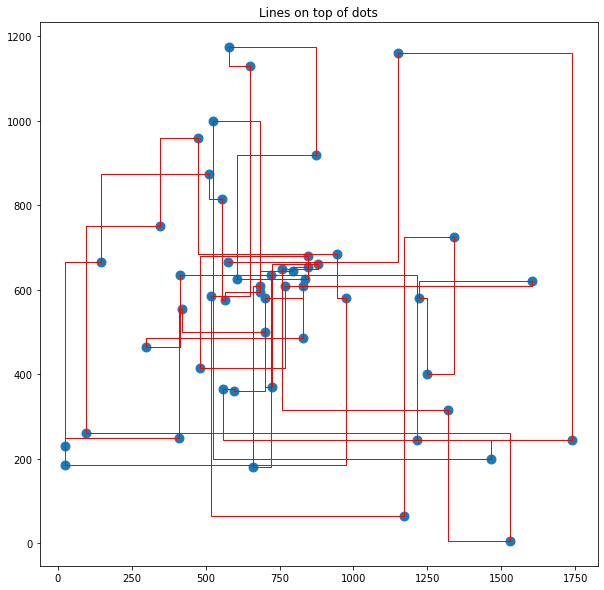

In [282]:
mc_data = mcRandomSamplingOpt(data, 100000)
plotData(data.loc[mc_data])

In [360]:
def Mutate(old_state):
    new_state = old_state.copy()
    dlen = len(new_state)
    rand1 = random.randint(0, dlen - 1)
    rand2 = random.randint(0, dlen - 1)
    new_state[rand1], new_state[rand2] = new_state[rand2], new_state[rand1]
    return new_state


In [595]:
def randomWalkOpt(data, itercount = 100000):
    min_dist = dist(data)
    cur_data = data.index.values.copy()
    best_data = cur_data.copy()
    dlen = len(cur_data)
    for i in range(0,itercount):
        if(i%10000==0):
            print(f"{i/itercount*100}%")
        cur_data = Mutate(cur_data)
        cdist = dist(data.loc[cur_data])
        if(cdist < min_dist):
            min_dist = cdist
            best_data = cur_data.copy()
            print(min_dist)
    return best_data


In [362]:
rw_inds = randomWalkOpt(data)

0.0%
10.0%
27425
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
27125
26555


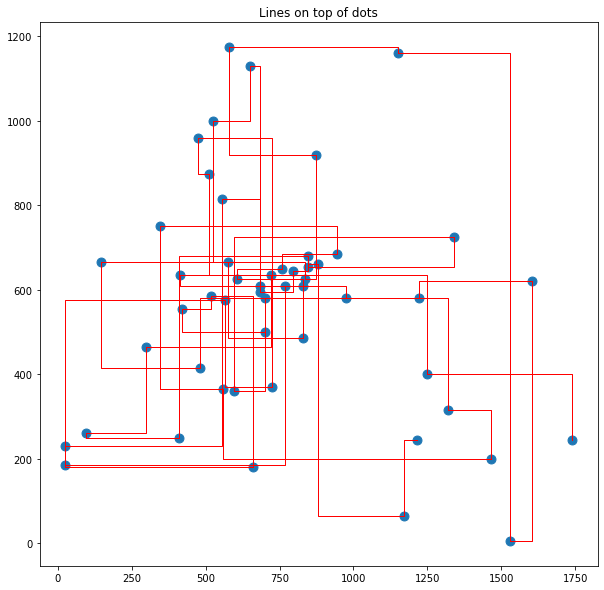

In [301]:
plotData(data.loc[rw_inds])

In [356]:
def hillClimbOpt(data, itercount = 50000):
    min_dist = dist(data)
    cur_data = data.index.values
    best_data = cur_data.copy()
    dlen = len(cur_data)
    swaps = [(i,j) for i in range(0, dlen - 1) for j in range(i, dlen -1)]

    for i in range(0,itercount//len(swaps)):
        print(f"{i/itercount*len(swaps)*100}%")
        for m,n in swaps:
            cur_data = best_data.copy()
            cur_data[m], cur_data[n] = cur_data[n], cur_data[m]
            cdist = dist(data.loc[cur_data])

            if(cdist < min_dist):
                min_dist = cdist
                best_data = cur_data.copy()
    return best_data

0.0%
2.652%
5.304%
7.956%
10.608%
13.26%
15.912%
18.563999999999997%
21.216%
23.868000000000002%
26.52%
29.172000000000004%
31.824%
34.476%
37.12799999999999%
39.78%
42.432%
45.084%
47.736000000000004%
50.388%
53.04%
55.692%
58.34400000000001%
60.99600000000001%
63.648%
66.3%
68.952%
71.604%
74.25599999999999%
76.908%
79.56%
82.21199999999999%
84.864%
87.516%
90.168%
92.82000000000001%
95.47200000000001%
12815


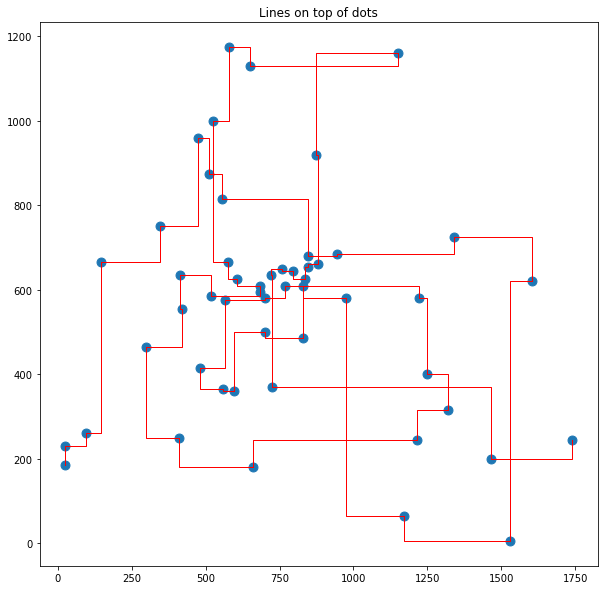

In [478]:
inds = hillClimbOpt(data, 50000)
print(dist(data.loc[inds]))
plotData(data.loc[inds])

In [596]:
def simulatedAnnealingOpt(data, itercount = 10000):
    start_temp = 100
    min_temp = 0.01
    t = start_temp
    best_dist = dist(data)
    cur_ind = data.index.values.copy()
    best_ind = cur_ind
    dlen = len(cur_data)
    for i in range(1,itercount):
        t = start_temp - (start_temp - min_temp)*i/itercount
        if(i%10000==0):
            print(f"{i/itercount*100}%")
        cur_ind = Mutate(best_ind)
        cdist = dist(data.loc[cur_ind])
        delta_e = cdist - best_dist
        if(delta_e < 0):
            best_ind = cur_ind.copy()
            best_dist = cdist
        elif(random.random() < np.exp(-delta_e/t)):
            best_ind = cur_ind.copy()
            best_dist = cdist
        if(t<min_temp):
            break
    return best_ind

20.0%
40.0%
60.0%
80.0%
10335


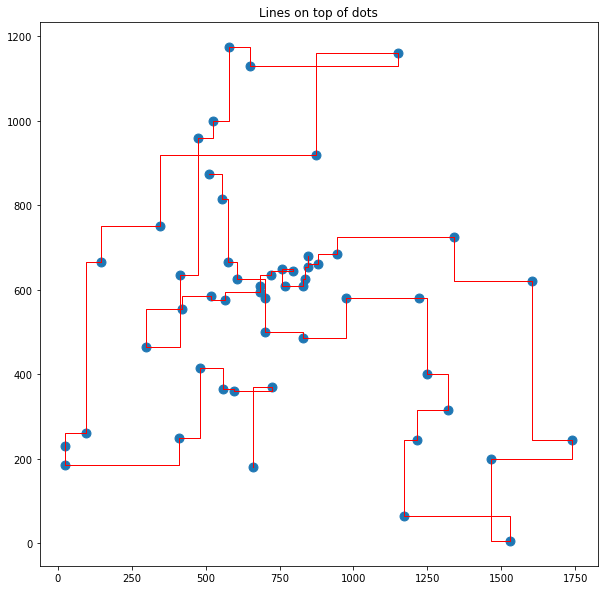

In [476]:
sa_inds = simulatedAnnealingOpt(data, 50000)
print(dist(data.loc[sa_inds]))
plotData(data.loc[sa_inds])

In [636]:
def Crossover(inds1, inds2):
    from_point = random.randint(0,len(inds1)-2)
    to_point = random.randint(from_point,len(inds1)-1)
    child = np.zeros(len(inds1)) 
    child[from_point:to_point] = inds1[from_point:to_point]
    fill_ind = 0
    i = 0
    for ind in inds2:
        i+=1
        if(ind not in child[from_point:to_point]):
            if(fill_ind >= from_point and fill_ind <= to_point):
                fill_ind = to_point
            child[fill_ind] = ind
            fill_ind+=1

    return child


In [676]:
def GeneticOpt(population_size = 20, iter_count = 100, mutation_p = 0.02):

    population = []
    for i in range(0, population_size):
        population.append(np.random.permutation(data.index.values))
        

    for i in range(0, iter_count):
        dists = [dist(data.loc[x]) for x in population]
        probs = dists/sum(dists)
        parent1, parent2 = (random.choices(population, probs, k = 2))
        child = Crossover(parent1, parent2)
        if(random.random() < mutation_p):
            dlen = len(child)
            rand1 = random.randint(0, dlen - 1)
            rand2 = random.randint(0, dlen - 1)
            child[rand1], child[rand2] = child[rand2], child[rand1]

        remove_choice = random.choices(range(0,len(probs)), probs)[0]
        
        population.pop(remove_choice)

        population.append(child)


        #population.append(Crossover(parent1, parent2))
        

    return [dist(data.loc[x]) for x in population]



    #for i in range(0, iter_count):
go_inds = GeneticOpt()

19.000000000000004
19.0
19.000000000000004
19.0
19.0
19.000000000000004
19.000000000000004
19.0
19.0
19.0
19.0
19.0
18.999999999999996
19.000000000000004
19.0
19.0
19.0
19.000000000000004
19.0
19.0
19.0
19.0
18.999999999999996
19.0
18.999999999999996
18.999999999999996
19.0
18.999999999999996
18.999999999999996
19.000000000000004
19.0
19.0
19.000000000000004
19.0
19.0
19.000000000000004
19.0
18.999999999999996
19.0
19.0
19.0
18.999999999999996
19.0
19.000000000000004
19.0
19.0
19.0
19.0
19.0
19.000000000000004
19.0
19.0
19.000000000000004
19.0
19.0
18.999999999999996
19.0
19.000000000000004
19.0
18.999999999999996
18.999999999999996
19.0
19.0
19.0
18.999999999999996
19.0
18.999999999999996
19.0
19.000000000000004
19.0
19.0
19.0
19.0
19.0
18.999999999999996
19.000000000000004
19.0
19.0
19.0
19.0
19.000000000000004
19.000000000000004
19.0
19.0
18.999999999999996
19.0
19.0
19.0
19.0
19.000000000000004
19.0
19.0
19.000000000000004
19.0
19.0
19.000000000000004
19.000000000000004
18.99999999

In [674]:
go_inds

[38900,
 33400,
 36295,
 36615,
 40745,
 35745,
 35515,
 35895,
 36295,
 33785,
 34665,
 32630,
 38400,
 37690,
 36295,
 36280,
 38120,
 33785,
 38715,
 32265]